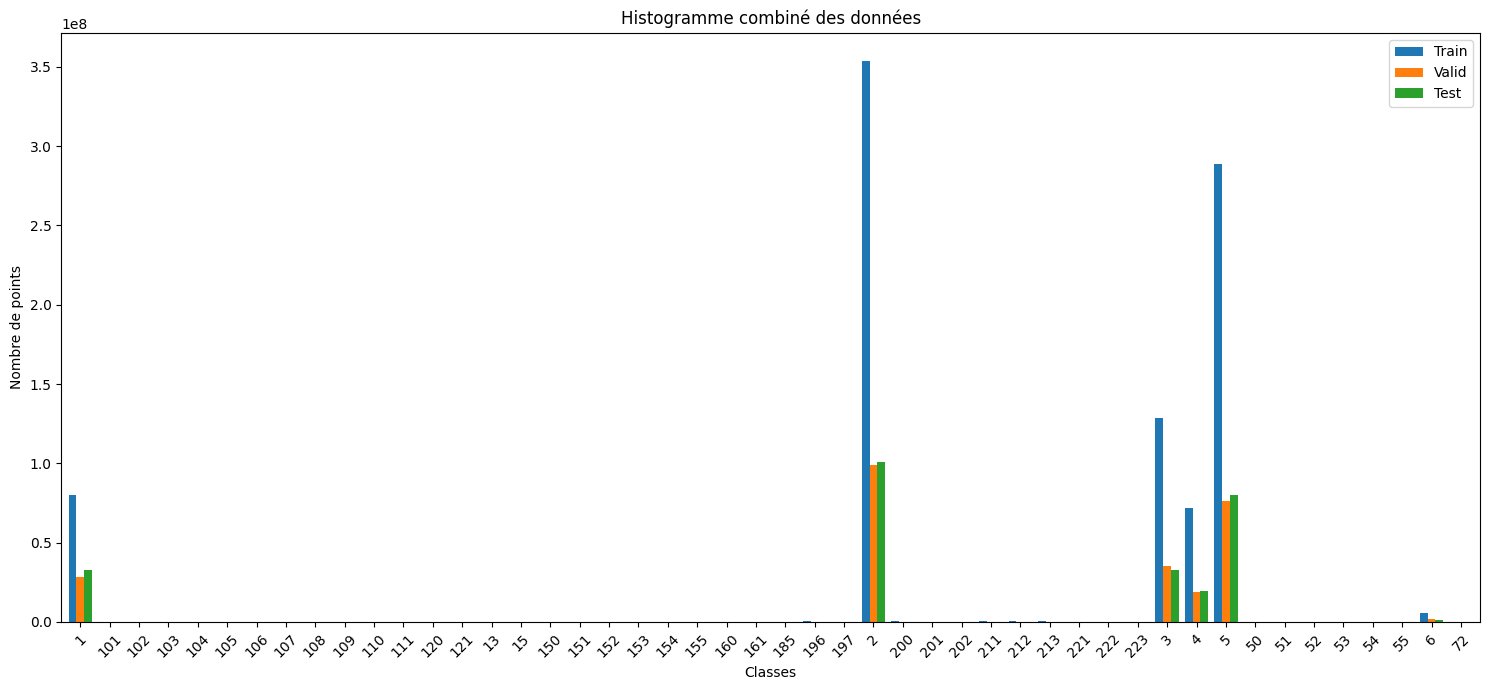

In [4]:
from DataStatYSO import *
import matplotlib.pyplot as plt

valid_data=stat_dictionary(r"E:/RTE_entrainement/IA_Train_Valid_Test/Valid/Statistiques_classes_valid.txt")

train_data=stat_dictionary(r"E:/RTE_entrainement/IA_Train_Valid_Test/Train/Statistiques_classes_train.txt")

test_data=stat_dictionary(r"E:/RTE_entrainement/IA_Train_Valid_Test/Test/Statistiques_classes_test.txt")

class_histog(train_data,valid_data,test_data)




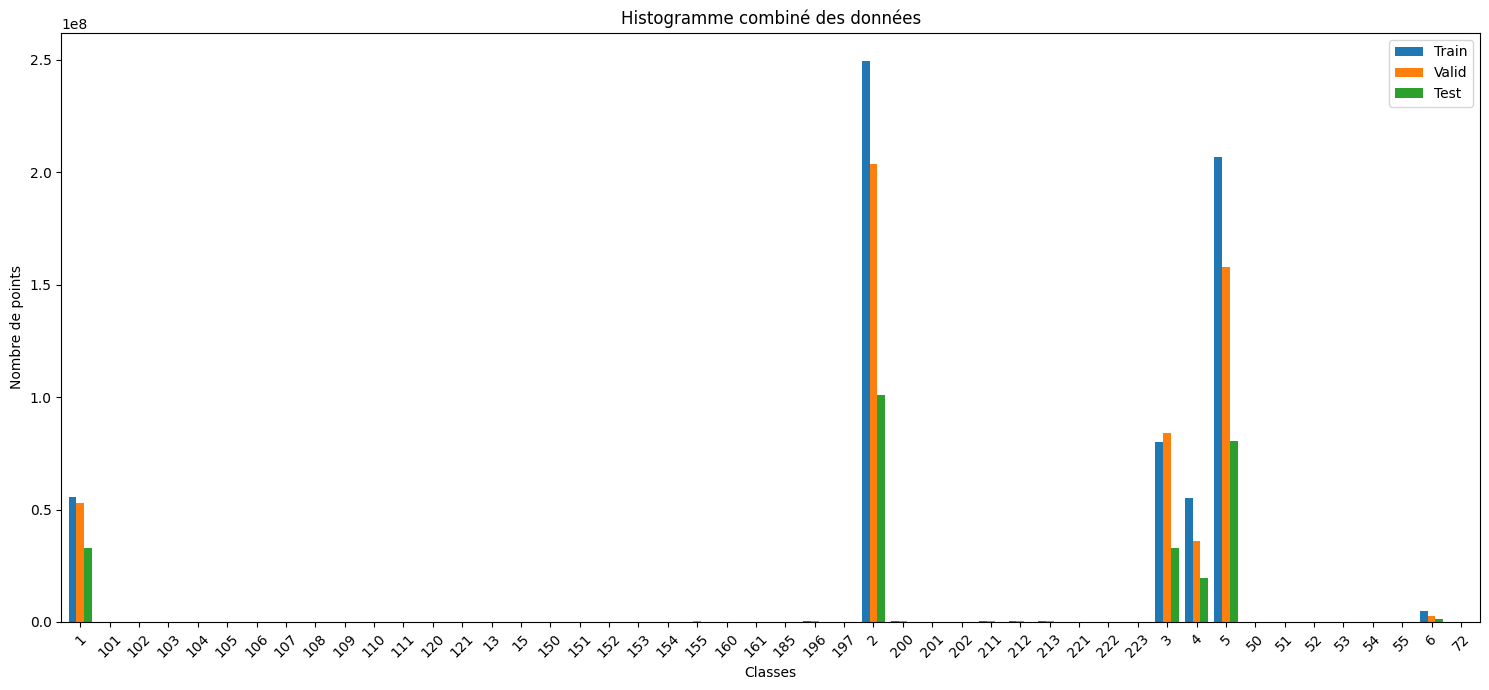

In [10]:
from DataStatYSO import *
import matplotlib.pyplot as plt

valid_data=stat_dictionary(r"E:/RTE_entrainement/IA_Train_Valid_Test/valid2/valid2stat.txt")

train_data=stat_dictionary(r"E:/RTE_entrainement/IA_Train_Valid_Test/train2/train2stat.txt")

test_data=stat_dictionary(r"E:/RTE_entrainement/IA_Train_Valid_Test/Test/Statistiques_classes_test.txt")

class_histog(train_data,valid_data,test_data)


In [1]:
conv_dict2 = {"1": 0, "2": 1, "3": 0, "4": 2, "5": 2, "6": 3, "7": 6,  "12": 0, "13": 0, "15": 0, "50": 0,
     "51": 0, "52": 0, "53": 0,"54": 0, "55": 0,  "64": 0,"72": 0,"101": 0,"102": 4,"103": 4, "104": 4,
      "105": 4,"106": 0,"107": 0,"108": 0,"109": 0, "110": 0,"111": 0, "120": 0, "121": 0,"150": 0,
      "151": 0,"152": 5,"153": 5,"154": 5, "155": 5,"160": 0,"161": 0,"185": 0,"196": 4,"197": 4,
      "200": 5,"201": 5,"202": 5,"211": 5,"212": 5, "213": 5,"221": 5,"222": 5, "223": 5
     }
model2 = {"0":1, "1":2, "2":5, "3":6, "4":196, "5":211}
direct_conv2={k:j for k, v in conv_dict2.items() for  i, j in model2.items()  if int(i) == v }

In [2]:
# Dictionnaires de données
test_data = {'1': 33069132, '2': 100692503, '3': 32920471, '4': 19378499, '5': 80371422, '6': 1490235, '13': 58, 
'50': 398, '51': 46, '52': 1598, '54': 44, '55': 32, '72': 2, '102': 1577, '103': 824, '104': 3227, '105': 18356, '106': 1180, 
'107': 659, '110': 405, '111': 99, '121': 747, '150': 733, '151': 1690, '152': 18254, '153': 6888, '154': 5368, '155': 36919, 
'190': 165, '161': 249, '185': 2629, '196': 150597, '197': 19942, '200': 128018, '201': 34645, '202': 9075, '211': 200067, 
'212': 199587, '213': 200251, '221': 63147, '222': 63001, '223': 90876}
test =

valid_data = {'1': 28220903, '2': 99271258, '3': 35369311, '4': 19143676, '5': 75996656, '6': 1989292, '50': 1100, '51': 47, 
'52': 468, '54': 414, '55': 584, '72': 30368, '102': 2010, '103': 2588, '104': 1161, '105': 11561, '106': 1403, '107': 909, 
'109': 40, '110': 436, '111': 405, '120': 248, '121': 121, '150': 1613, '151': 3254, '152': 10114, '153': 17581, '154': 3307,
'155': 49931, '190': 598, '161': 310, '185': 862, '196': 154713, '197': 14047, '200': 125970, '201': 30033, '211': 194209, 
'212': 193977, '213': 195685, '221': 34267, '222': 33588, '223': 33944}

train_data = {'1': 80316467, '2': 353778358, '3': 128724848, '4': 71859244, '5': 288693557, '6': 5924166, '15': 769, '50': 3514,
'51': 392, '52': 5189, '53': 202, '54': 591, '55': 1231, '72': 24900, '101': 129, '102': 5941, '103': 7901, '104': 18096, '105': 58204,
'106': 3107, '107': 2352, '108': 249, '109': 166, '110': 1337, '111': 795, '120': 731, '121': 571, '150': 5321, '151': 6320, '152': 43529,
'153': 62900, '154': 64025, '155': 256284, '190': 522, '161': 951, '185': 9004, '196': 520863, '197': 40109, '200': 417787, '201': 122927,
'211': 666195, '212': 657276, '213': 656500, '221': 164678, '222': 162435, '223': 161178}

def class_histog(train_data,valid_data,test_data):
    # Convertir les dictionnaires en DataFrame
    df_test = pd.DataFrame(list(test_data.items()), columns=['Category', 'Test'])
    df_valid = pd.DataFrame(list(valid_data.items()), columns=['Category', 'Valid'])
    df_train = pd.DataFrame(list(train_data.items()), columns=['Category', 'Train'])



    """f = JsonFile(r"E:/config_rte2_poles_big.json")
    Config_file = f.read_json()
    category_to_class_name =  Config_file['class']
    print(category_to_class_name)

    df_test['Category'] = df_test['Category'].map(category_to_class_name)
    df_valid['Category'] = df_valid['Category'].map(category_to_class_name)
    df_train['Category'] = df_train['Category'].map(category_to_class_name)"""

    # Fusionner les DataFrames sur la colonne 'Category'
    df_merged = df_train.merge(df_valid, on='Category', how='outer').merge(df_test, on='Category', how='outer')
    #print(df_merged)

    # Remplacer les valeurs NaN par 0
    df_merged = df_merged.fillna(0)

    # Créer l'histogramme
    df_merged.set_index('Category').plot(kind='bar', figsize=(15, 7), width=0.8)

    # Ajouter un titre et des labels
    plt.title('Histogramme combiné des données')
    plt.xlabel('Classes')
    plt.ylabel('Nombre de points')
    plt.xticks(rotation=45)

    # Afficher le graphique
    plt.tight_layout()
    plt.show()

class_histog(train_data,valid_data,test_data)

{'1': 1,
 '2': 2,
 '3': 1,
 '4': 5,
 '5': 5,
 '6': 6,
 '12': 1,
 '13': 1,
 '15': 1,
 '50': 1,
 '51': 1,
 '52': 1,
 '53': 1,
 '54': 1,
 '55': 1,
 '64': 1,
 '72': 1,
 '101': 1,
 '102': 196,
 '103': 196,
 '104': 196,
 '105': 196,
 '106': 1,
 '107': 1,
 '108': 1,
 '109': 1,
 '110': 1,
 '111': 1,
 '120': 1,
 '121': 1,
 '150': 1,
 '151': 1,
 '152': 211,
 '153': 211,
 '154': 211,
 '155': 211,
 '160': 1,
 '161': 1,
 '185': 1,
 '196': 196,
 '197': 196,
 '200': 211,
 '201': 211,
 '202': 211,
 '211': 211,
 '212': 211,
 '213': 211,
 '221': 211,
 '222': 211,
 '223': 211}